COMO SABER SE UMA DETERMINADA AÇÃO SE VALORIZOU EM UM DETERMINADO TEMPO.

In [4]:

#import pandas_datareader as pdr # 'pdr.data' para acessar o módulo 'data' dentro do pandas_datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [5]:
# Lista de tickers
tickers = ['BBAS3.SA','BBDC4.SA','ITUB4.SA','ITSA4.SA']
# Dicionário para armazenar os dados
dados = {}
# Obtendo os dados de cada ação e armazenando no dicionário
for t in tickers:
    ticker_data = yf.download(t, start='2019-10-01')['Adj Close']
    dados[t] = ticker_data

# Criando um DataFrame com os dados
dados_df = pd.DataFrame(dados)

# Imprimindo o DataFrame
print(dados_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             BBAS3.SA   BBDC4.SA   ITUB4.SA  ITSA4.SA
Date                                                 
2019-10-01  35.199429  20.064898  30.082167  9.297802
2019-10-02  34.001305  19.290262  29.255825  9.082408
2019-10-03  35.465668  19.344267  29.264620  8.974710
2019-10-04  35.708427  19.542269  29.405262  8.981888
2019-10-07  34.298878  19.416267  28.860250  8.744959
...               ...        ...        ...       ...
2023-07-31  48.189999  16.640980  28.622351  9.820000
2023-08-01  47.360001  16.601027  28.709999  9.800000
2023-08-02  47.570000  16.670000  28.620001  9.850000
2023-08-03  47.650002  16.549999  28.400000  9.840000
2023-08-04  47.400002  15.450000  27.879999  9.760000

[957 rows x 4 columns

In [6]:
display(dados_df.round(2)) # round(2) pq só quero duas casa depois da virgula


,BBAS3.SA,BBDC4.SA,ITUB4.SA,ITSA4.SA
Date,,,,
2019-10-01,35.20,20.06,30.08,9.30
2019-10-02,34.00,19.29,29.26,9.08
2019-10-03,35.47,19.34,29.26,8.97
2019-10-04,35.71,19.54,29.41,8.98
2019-10-07,34.30,19.42,28.86,8.74
...,...,...,...,...
2023-07-31,48.19,16.64,28.62,9.82
2023-08-01,47.36,16.60,28.71,9.80
2023-08-02,47.57,16.67,28.62,9.85


In [7]:
dados_df.isnull().sum() #procurando dados faltantes

BBAS3.SA    2
BBDC4.SA    2
ITUB4.SA    2
ITSA4.SA    2
dtype: int64

NORMALIZAR

In [8]:
dados_df.iloc[0] # nos mostra os primeiros valores de cada tickers

BBAS3.SA    35.199429
BBDC4.SA    20.064898
ITUB4.SA    30.082167
ITSA4.SA     9.297802
Name: 2019-10-01 00:00:00, dtype: float64

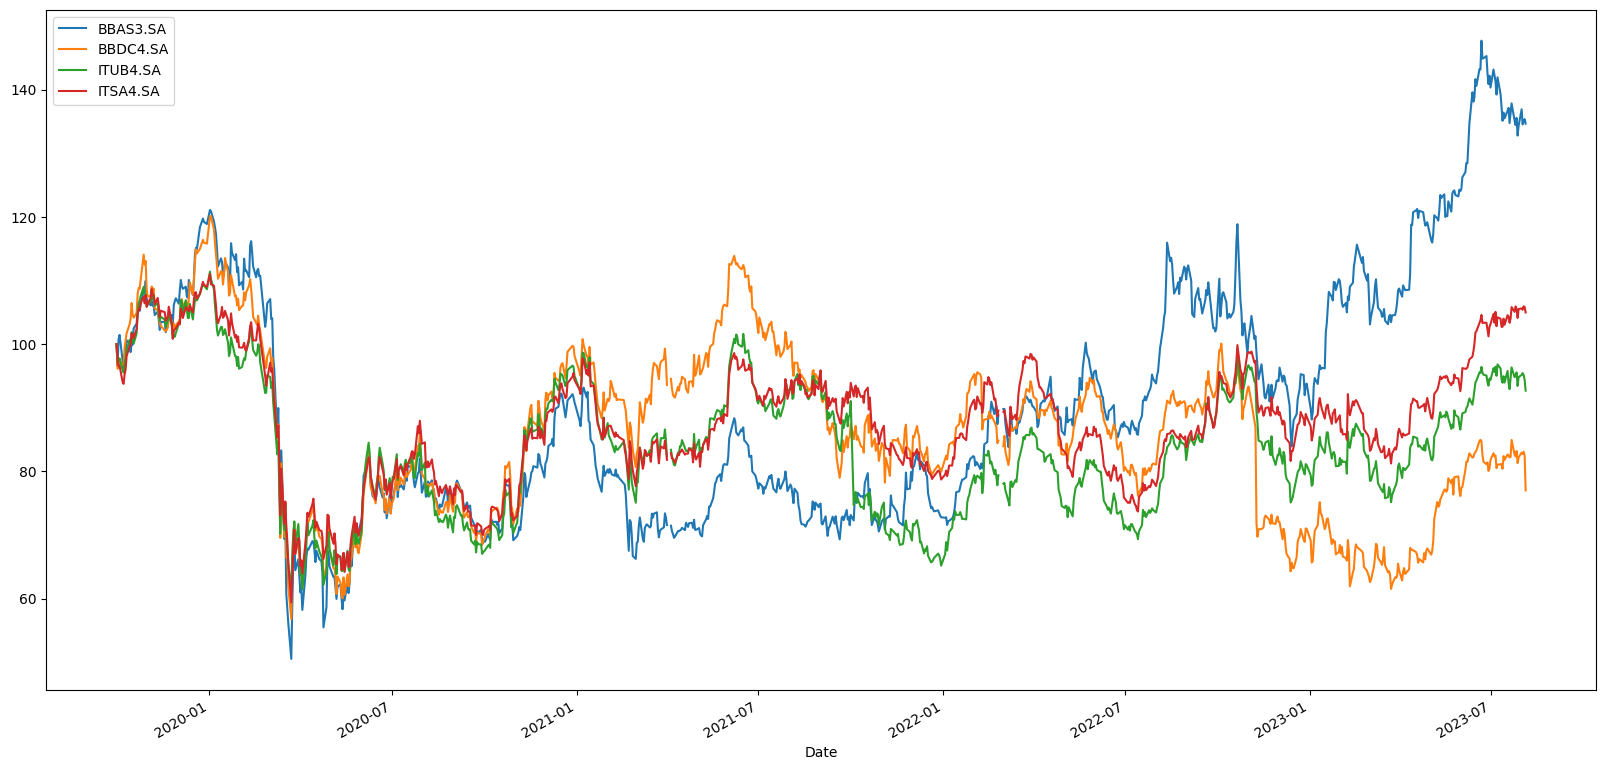

In [9]:
(dados_df/dados_df.iloc[0]*100).plot(figsize=(20,10))
plt.show()

As ações do Banco Brasil de fato foram as que mais se valorizaram ao longo desses anos.

CALCULO DE RETORNO DA CARTEIRA

In [17]:
# Calculando o retorno diário dos dados financeiros
retorno = (dados_df / dados_df.shift(1)) - 1

# Exibindo o DataFrame com os retornos diários
display(retorno)

# Definindo os pesos como um array NumPy
pesos = np.array([0.10]) # todas com 10%

# Calculando o retorno anual médio dos ativos
retorno_a = retorno.mean() * 250

# Convertendo o retorno_a para um array NumPy e usando reshape
retorno_a_array = retorno_a.to_numpy().reshape(1, -1)

# Calculando o retorno anual ponderado usando o produto interno (dot product)
resultado = np.dot(pesos, retorno_a_array)

# Exibindo o resultado como uma porcentagem
retorno_ponderado_porcentagem = round(resultado[0] * 100, 2)

print("Retorno Anual Ponderado da carteira:", f"{retorno_ponderado_porcentagem}%")


,BBAS3.SA,BBDC4.SA,ITUB4.SA,ITSA4.SA
Date,,,,
2019-10-01,NaN,NaN,NaN,NaN
2019-10-02,-0.034038,-0.038606,-0.027469,-0.023166
2019-10-03,0.043068,0.002800,0.000301,-0.011858
2019-10-04,0.006845,0.010236,0.004806,0.000800
2019-10-07,-0.039474,-0.006448,-0.018534,-0.026379
...,...,...,...,...
2023-07-31,0.019247,0.009085,0.003504,0.001019
2023-08-01,-0.017223,-0.002401,0.003062,-0.002037
2023-08-02,0.004434,0.004155,-0.003135,0.005102


Retorno Anual Ponderado da carteira: 1.6%
